In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure default style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 2. Load the COVID-19 Dataset from Our World in Data
df = pd.read_csv('./data/owid-covid-data.csv')

# 3. View the structure
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (351412, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


### Data Cleaning

In [5]:
# Filter countries of interest
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

# Drop missing dates and essential values
df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])

# Convert date column
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Handle missing numeric values
df_filtered.fillna(0, inplace=True)


## Exploratory Data Analysis (EDA)

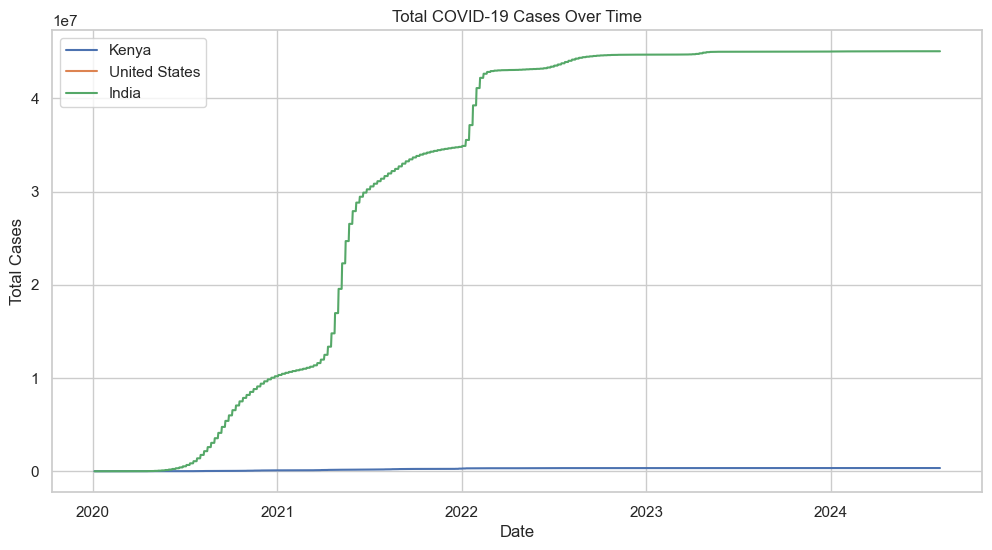

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total cases over time
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


In [8]:
# Ensure inline display for Jupyter
%matplotlib inline

# Load dataset
# df = pd.read_csv("data/owid-covid-data.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter relevant countries
countries = ['Kenya', 'India', 'United States']
filtered_df = df[df['location'].isin(countries)]

# Fill missing values with 0 for visualization
filtered_df[['total_cases', 'total_deaths']] = filtered_df[['total_cases', 'total_deaths']].fillna(0)


C:\Users\Tiff\AppData\Local\Temp\ipykernel_13080\1341047144.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['total_cases', 'total_deaths']] = filtered_df[['total_cases', 'total_deaths']].fillna(0)


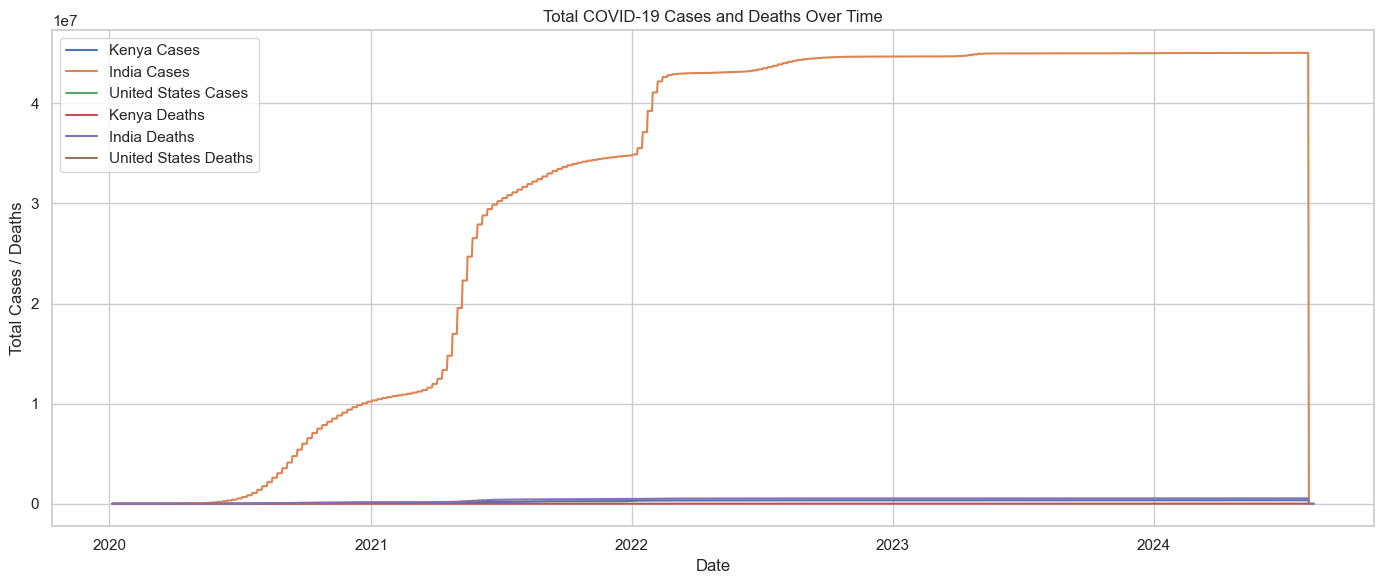

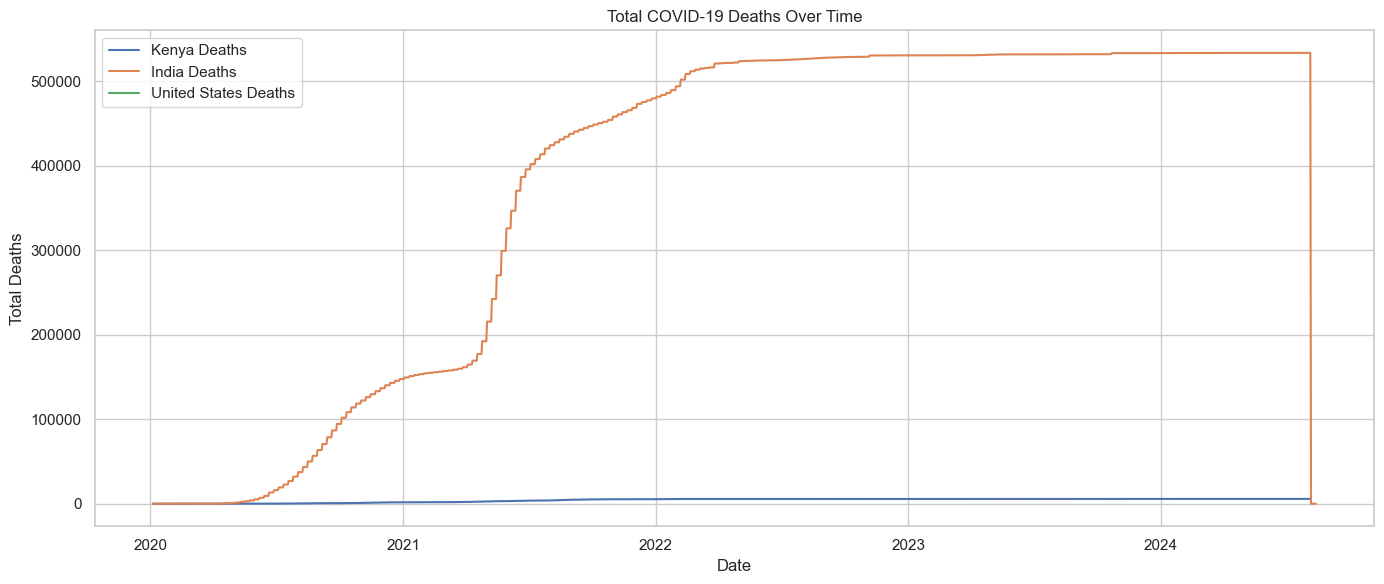

In [9]:
# Line Chart Total Cases and Deaths Over Time
plt.figure(figsize=(14, 6))

# Total Cases
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=f"{country} Cases")

# Total Deaths
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=f"{country} Deaths")

plt.title("Total COVID-19 Cases and Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases / Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Repeat for deaths
plt.figure(figsize=(14, 6))
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=f"{country} Deaths")

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Tiff\AppData\Local\Temp\ipykernel_13080\1174671176.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_cases', y='location', data=top10, palette='Reds_r')


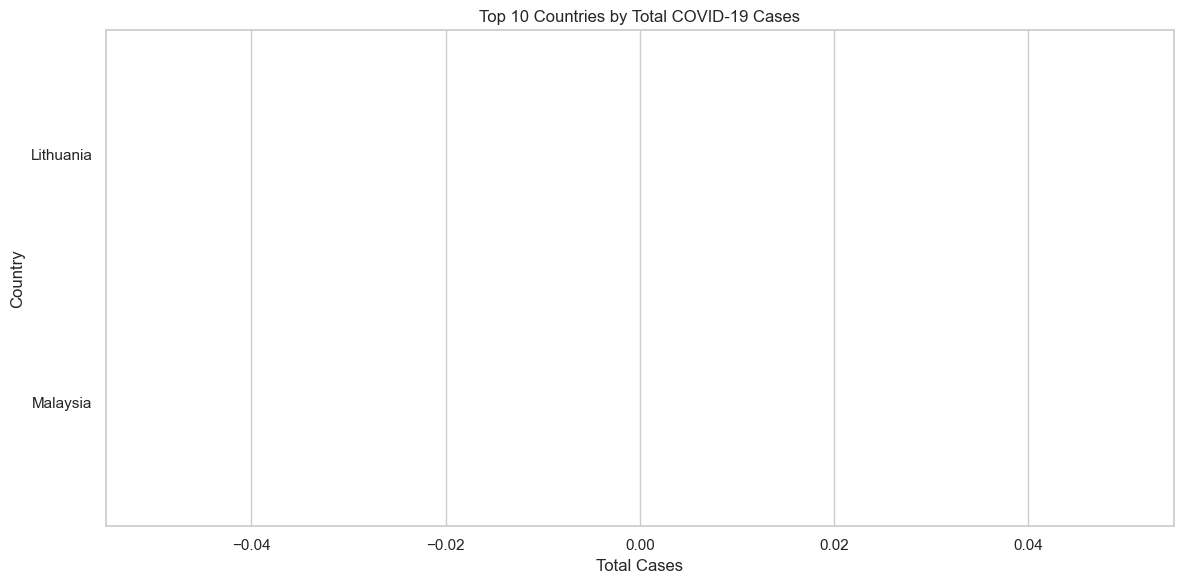

In [10]:
# Bar chat  Top 10 Countries by Total Cases

# Get the latest available data per country
latest_data = df[df['date'] == df['date'].max()]

# Drop continents or aggregates
latest_data = latest_data[latest_data['iso_code'].str.len() == 3]

# Sort and select top 10
top10 = latest_data.sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top10, palette='Reds_r')
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## Heat map

c:\Users\Tiff\miniconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Tiff\miniconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


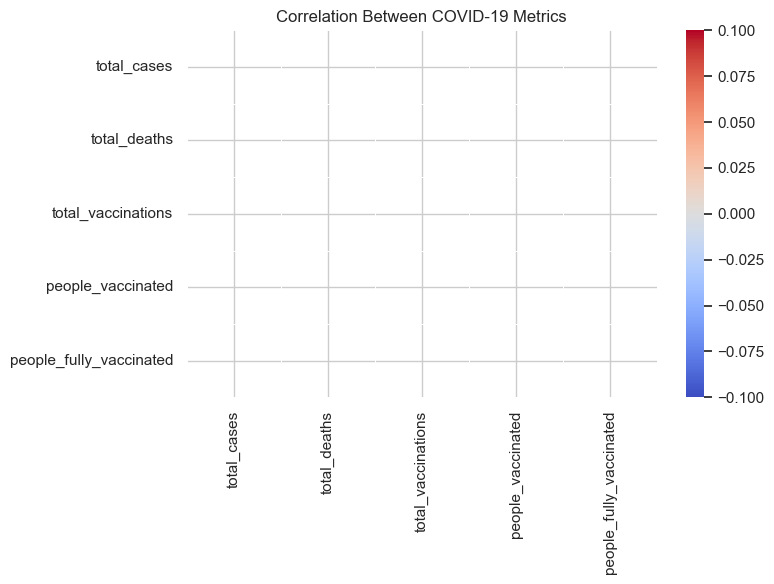

In [11]:
# Select relevant numeric columns and drop NaNs
heatmap_data = latest_data[['total_cases', 'total_deaths', 'total_vaccinations',
                            'people_vaccinated', 'people_fully_vaccinated']].dropna()

# Compute correlation matrix
corr_matrix = heatmap_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between COVID-19 Metrics")
plt.tight_layout()
plt.show()


## Vaccination Progresss

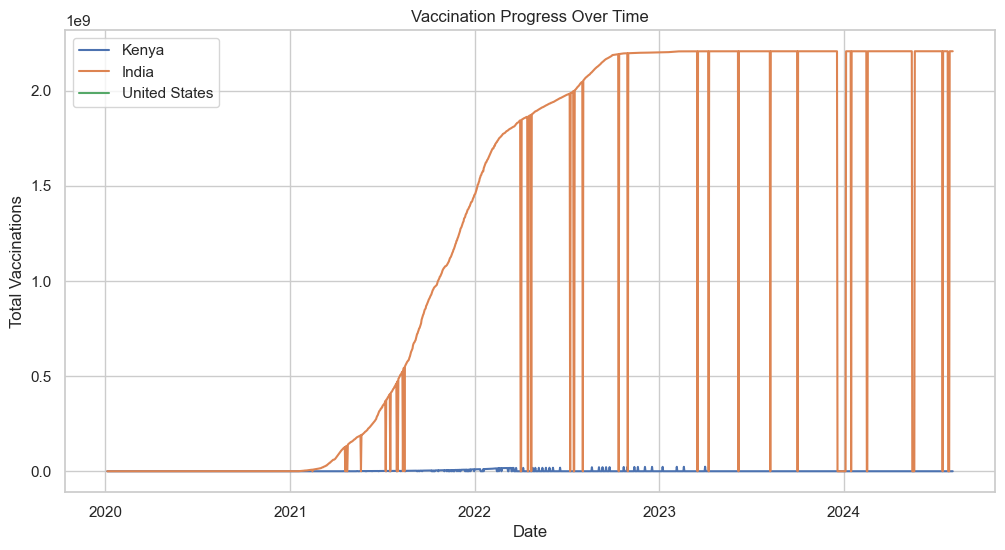

In [12]:
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Vaccination Progress Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()


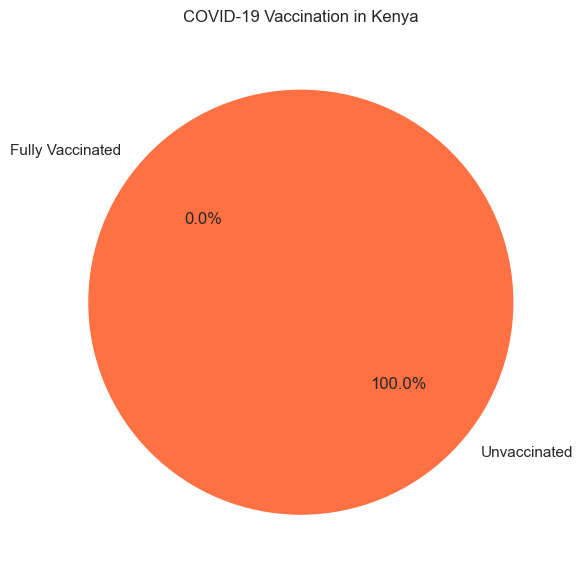

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/owid-covid-data.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Select the most recent data for a country
country = "Kenya"  # Change to your country of interest
latest_data = df[(df['location'] == country) & (df['date'] == df[df['location'] == country]['date'].max())]

# Extract values
population = latest_data['population'].values[0]
fully_vaccinated = latest_data['people_fully_vaccinated'].fillna(0).values[0]
unvaccinated = population - fully_vaccinated

# Pie chart
labels = ['Fully Vaccinated', 'Unvaccinated']
sizes = [fully_vaccinated, unvaccinated]
colors = ['#4CAF50', '#FF7043']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f"COVID-19 Vaccination in {country}")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

latest_data = df[df['date'] == df['date'].max()]
fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="COVID-19 Total Cases by Country")
fig.show()
